# How COVID-19 Affected House and Car Sales

Video link: https://youtu.be/wseuNXneqpU

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X ] YES - make available
* [  ] NO - keep private

# Overview

Our goal was to study and identify correlations between COVID-19 positive cases and purchases of luxury cars and houses in the United States. We use COVID-19 positive cases as an approximation of severity of public health situation at a point of time since it is close to how COVID-19 pandemic was addressed in the news and by the officials. The idea of this question was driven by our prior knowledge of difference between luxury goods and necessities and their theoretical response to different economic situations. We found that there was no relationship between total number of COVID-19 cases and house sales or car sales based on the results of linear regression models.

# Names

- Shresht Venkatraman
- Ishani Sikdar
- Raul Martinez Beltran
- Ilya Kogan

<a id='research_question'></a>
# Research Question

How did the purchases of new luxury cars and houses relate to positive COVID-19 cases count from the beginning of the COVID-19 pandemic to September 2022 in the US?

<a id='background'></a>

## Background & Prior Work

The COVID-19 pandemic reached major headlines across national news by inflicting a major impact upon the globe. While the pandemic contributed a major impact in terms of health to the entire globe, it has also affected everyone in terms of their ways of life. Specifically, the economy was heavily impacted on a large scale, ultimately falling onto each invidiual (Crosta).

Consumer behavior had changed as a result of pandemic in which people transitioned from spending much of their money on non-necessity items, such as clothing and entertainment, to taking a percentage of such set of items to necessity items for survivial such as food and water (Crosta). 

Furthermore, the pandemic has suggested new ways in which people can adapt to new purchasing and safety regulations set in place for people to partake in. A transition from people physically going in-person to an area of commerce, to accessing much of the items online, concerns of health had been a major factor to driving the transition of consumer preferences. Additionally, the high prevelence that social media (Whatsapp, TikTok, etc.) has played when it comes to exposing the userbase to new things (Sheth).

There is current research on  the effect of COVID-19 on many topics such as physical and mental health, socialization, and businesses. A previous sentiment analysis project at UC San Diego over the course of COVID-19 pandemic, concluded that students believed that UC San Diego underperformed in adapting to COVID (Group 043 Fall 2021).

Such discussion is relevant to the analysis we are exploring with regards to consumer preferences during the COVID-19 pandemic. Furthermore, this allows us to be able formulate exactly how consumers are responding when met with a health crisis.

- 1. Di Crosta, Adolfo, et al. (15 Dec 2021) Psychological factors and consumer behavior during the CVOID-19 pandemic. PLoS One. *National Library of Medicine* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8366984/

- 2. Sheth, Jagdish. (4 Jun 202) Impact of Covid-19 on consumer behavior. WIll the old habits return or die? * Elsevier Public Health Emergency Collection. *National Library of Medicine* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7269931/

- 3. COGS 108 Project Group 043 Fall 2021. https://github.com/COGS108/FinalProjects-Fa21/blob/main/FinalProjectGroup043-Fa21.ipynb

# Hypothesis


Our hypothesis is that with the increase in number of positive cases the purchase of new cars will decrease and the purchase of new houses will increase across all states. Over the course of COVID-19, people may prioritize having more space and traveling less due to travel restrictions. However, we, also, anticipate that during the lockdown period of approximately April 2020 - June 2020, both car sales and house sales decreased due to paralization of all sectors of economy.

# Dataset(s)

- Dataset Name: **House Sales during Covid**
- Link to the dataset: "data/Metro_sales_count_now_uc_sfrcondo_month.csv"
- Number of observations: 17014

This data set contains information on the number of Houses sold during the Period 29th February 2008 to 30th September 2022. It contains a row for the entire United States as well as a state wise break-down of House Sales during this period. 
In our clearning stage we filter out the null values and cut it down to only include US-wide data for within our Covid period of March 2020 to August 2022.


- Dataset Name: **Weekly_United_States_COVID-19_Cases_and_Deaths_by_State**
- Link to the dataset: "data/Weekly_United_States_COVID-19_Cases_and_Deaths_by_State.csv"
- Number of observations: 900,000

This is United States Government data collected during the outbreak of the COVID pandemic. The original data set contains nationwide data on the total cases, number of new cases, number of hospitalizations, number of death for every week from Januray 2020.
Like with the previous data set we restrict our time period to March 2020 to August 2022 and focus on the total number of cases for every month. 

- Dataset Name: **COVID_Cars**
- Link to the dataset: "2020_Small_Mid-Sheet1.csv", "2021_small_mid-Sheet1.csv", "2022_small_mid-Sheet1.csv"
- Number of observations: 1476

This is data set was obtained from a website called 'GoodCarBadCar" which collates US Transportation Department data on the purchase of various brands of cars. We used their Small and Mid Luxury Cars data sets for 2020,2021 and 2022 for this investigation. It contains the total quantitiy of each of these luxury cars sold during each of the threee years. We merge all 3 for the period March 2020 to August 2022 to be relevant to our investigation

# Setup

In [37]:
# import pandas, numpy, and seaborn
import pandas as pd
import numpy as np
import seaborn as sns

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

# import statsmodels and patsy
import statsmodels.api as sm
import patsy

#improve resolution
%config InlineBackend.figure_format ='retina'

# Data Cleaning

We will now obtain the below **sales** dataframe and convert in into a more consise data frame that will contain data only during the time period of March 2020 - August 2022.

In [38]:
#load dataset
sales = pd.read_csv('data/Metro_sales_count_now_uc_sfrcondo_month.csv')

#display
sales

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,102001,0,United States,country,NaN,152227.0,182137.0,203555.0,222504.0,236836.0,...,388209.0,298325.0,270176.0,361637.0,351893.0,375035.0,393128.0,336336.0,360221.0,314221.0
1,394913,1,"New York, NY",msa,NY,7435.0,7996.0,8685.0,8923.0,9504.0,...,16910.0,16860.0,13315.0,15282.0,12418.0,14029.0,15478.0,16729.0,17154.0,14635.0
2,753899,2,"Los Angeles, CA",msa,CA,3260.0,3853.0,4684.0,5205.0,5323.0,...,8843.0,6306.0,6079.0,8685.0,8263.0,7826.0,7634.0,6201.0,6545.0,5918.0
3,394463,3,"Chicago, IL",msa,IL,3875.0,4662.0,5367.0,5309.0,6501.0,...,10295.0,8634.0,6306.0,9819.0,10523.0,11312.0,12196.0,10632.0,11132.0,8466.0
4,394514,4,"Dallas, TX",msa,TX,4496.0,5444.0,6209.0,6467.0,6666.0,...,8333.0,6156.0,5813.0,7611.0,7283.0,8122.0,8257.0,7554.0,7583.0,6769.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,394549,91,"Durham, NC",msa,NC,336.0,425.0,484.0,663.0,686.0,...,808.0,568.0,567.0,759.0,795.0,904.0,949.0,745.0,707.0,630.0
90,395143,92,"Syracuse, NY",msa,NY,355.0,359.0,439.0,523.0,640.0,...,689.0,481.0,399.0,415.0,405.0,452.0,625.0,626.0,757.0,647.0
91,395224,93,"Wichita, KS",msa,KS,57.0,74.0,82.0,73.0,87.0,...,189.0,156.0,123.0,173.0,164.0,109.0,199.0,147.0,140.0,127.0
92,395160,94,"Toledo, OH",msa,OH,173.0,220.0,254.0,291.0,302.0,...,568.0,456.0,379.0,444.0,506.0,565.0,671.0,603.0,670.0,550.0


Steps taken to clean and format this dataframe are commented in the code.

In [39]:
#obtain a row which corresponds to US-wide values and drop columns which do have measurements of sales
only_vals = pd.DataFrame(sales.iloc[0,5:]).reset_index()

#format dates which were indeces to a proper column
only_vals['date'] = pd.to_datetime(only_vals['index'])
only_vals = only_vals.iloc[:,1:]

#rename columns
only_vals.columns = ['total_sales','date']

#create year and month columns for easier merging in future steps
only_vals['year'] = only_vals['date'].dt.year
only_vals['month'] = only_vals['date'].dt.month

#slice to get data from time interval of interest
covid_house_sales = only_vals.loc[only_vals['year'] >= 2020]

#drop January and February of 2020
covid_house_sales = covid_house_sales.iloc[2:,:]

#display cleaned dataframe
covid_house_sales

,total_sales,date,year,month
145,330419.0,2020-03-31,2020,3
146,295684.0,2020-04-30,2020,4
147,283667.0,2020-05-31,2020,5
148,387808.0,2020-06-30,2020,6
149,468119.0,2020-07-31,2020,7
150,458327.0,2020-08-31,2020,8
151,459520.0,2020-09-30,2020,9
152,469298.0,2020-10-31,2020,10
153,403270.0,2020-11-30,2020,11
154,435993.0,2020-12-31,2020,12


We now load our covid data set.

In [40]:
#load dataset
new_covid = pd.read_csv('data/Weekly_United_States_COVID-19_Cases_and_Deaths_by_State.csv')
new_covid

,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths
0,2020-01-23,AK,2020-01-16,2020-01-22,0,0,0,0,0,0
1,2020-01-30,AK,2020-01-23,2020-01-29,0,0,0,0,0,0
2,2020-02-06,AK,2020-01-30,2020-02-05,0,0,0,0,0,0
3,2020-02-13,AK,2020-02-06,2020-02-12,0,0,0,0,0,0
4,2020-02-20,AK,2020-02-13,2020-02-19,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8995,2022-11-03,WY,2022-10-27,2022-11-02,178857,421,1914,6,0,0
8996,2022-11-10,WY,2022-11-03,2022-11-09,179349,492,1917,3,0,0
8997,2022-11-17,WY,2022-11-10,2022-11-16,179838,489,1924,7,0,0
8998,2022-11-24,WY,2022-11-17,2022-11-23,180426,588,1931,7,0,0


Similarly, we slice this dataframe so we have the data from March 2020 to August 2022 and in the same format.

In [41]:
#convert date to dateTime format and create separate year and month columns like above
new_covid['date_updated'] = pd.to_datetime(new_covid['date_updated'])
new_covid['year'] = new_covid['date_updated'].dt.year
new_covid['month'] = new_covid['date_updated'].dt.month

#drop columns so that we are only left with dates, number of cases, and states
new_covid = new_covid.drop(['start_date', "end_date", "new_cases","tot_deaths", "new_deaths","new_historic_cases","new_historic_deaths"], 1)

#sum up cases by months (and years) to get total number of cases as a trend
new_covid = new_covid.groupby(['month','year']).sum().reset_index()

#drop rows that are outside of March 2020 - August 2022 time frame
new_covid.drop([0,3,29,32,35],0, inplace = True)
new_covid

/var/folders/_8/949s60_149n5bnn4kn3zgm_c0000gn/T/ipykernel_25248/3366096703.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  new_covid = new_covid.drop(['start_date', "end_date", "new_cases","tot_deaths", "new_deaths","new_historic_cases","new_historic_deaths"], 1)
/var/folders/_8/949s60_149n5bnn4kn3zgm_c0000gn/T/ipykernel_25248/3366096703.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_covid = new_covid.groupby(['month','year']).sum().reset_index()
/var/folders/_8/949s60_149n5bnn4kn3zgm_c0000gn/T/ipykernel_25248/3366096703.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  new_covid.drop([0,3,29,32,35],0, inpl

,month,year,tot_cases
1,1,2021,94980560
2,1,2022,263229175
4,2,2021,110434169
5,2,2022,310744121
6,3,2020,80625
7,3,2021,117791325
8,3,2022,398753183
9,4,2020,3235318
10,4,2021,157028952
11,4,2022,323048174


We now need to calculate monthly increase in cases, so that this data displays monthly cases(not cumulative) like car sales and house sales dataframes show monthly sales.

In [42]:
#first, sort dataframe by ascending date
new_covid.sort_values(by=['year', 'month'] , axis=0, ascending=True, inplace=True)
new_covid = new_covid.reset_index(drop=True)

#calculate the difference between sequential months to obtain monthly cases
for i in range(1,31):
    new_covid['tot_cases'][i] = new_covid['tot_cases'][i] - new_covid['tot_cases'][i-1]

#show result
new_covid

,month,year,tot_cases
0,3,2020,80625
1,4,2020,3154693
2,5,2020,2742809
3,6,2020,5611648
4,7,2020,11974289
5,8,2020,9342275
6,9,2020,16676113
7,10,2020,23258669
8,11,2020,21384416
9,12,2020,63789515


Now we need to import data on luxury car sales in the US for the same period. We have 3 data files for each of the 3 years.

In [43]:
#read in datasets
cars20 = pd.read_csv('data/2020_Small_Mid - Sheet1.csv')
cars21 = pd.read_csv('data/2021_small_mid - Sheet1.csv')
cars22 = pd.read_csv('data/2022_small_mid - Sheet1.csv')

#join them together
covid_cars = pd. concat([cars20, cars21, cars22],axis=1)

#we drop model names and mkae dates into a cloumn
covid_cars = covid_cars.T.reset_index().drop([0,13,26],0).reset_index()

#we drop the not needed level0 column that appeared due reindexing above
covid_cars = covid_cars.iloc[: , 1:]
covid_cars

/var/folders/_8/949s60_149n5bnn4kn3zgm_c0000gn/T/ipykernel_25248/3772317648.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  covid_cars = covid_cars.T.reset_index().drop([0,13,26],0).reset_index()


,index,0,1,2,3,4,5,6,7,8,...,30,31,32,33,34,35,36,37,38,39
0,1/1/2020,935,"1,769",571,727,"1,283","1,728",576,"3,447",714,...,456,37,67,"3,037",227,508,"1,131","2,293","19,000",102
1,1/2/2020,"1,083","2,263",740,941,"1,661","2,237",745,"4,463",924,...,457,48,60,"3,356",224,657,"1,464","2,969","17,500",136
2,1/3/2020,723,"1,452",448,570,"1,006","1,355",451,"2,703",560,...,284,29,62,"2,854",173,398,887,"1,798","8,000",116
3,1/4/2020,506,"1,024",305,342,795,898,685,"1,388",317,...,161,3,29,"1,397",122,182,537,"1,234","5,400",91
4,1/5/2020,"1,039","1,467",677,761,"1,766","1,996","1,522","3,085",704,...,319,6,64,"3,105",272,405,"1,194","2,743","12,000",178
5,1/6/2020,"1,109","1,439",711,799,"1,854","2,096","1,598","3,239",739,...,324,6,67,"3,260",285,425,"1,254","2,880","12,600",263
6,1/7/2020,"1,230","1,886",769,896,"2,089","1,304","1,467","3,638",587,...,242,2,70,"3,868",269,455,"1,285","2,271","31,208",332
7,1/8/2020,"1,331","1,973",683,796,"1,857","1,159","1,299","3,222",520,...,226,2,62,"4,366",330,404,"1,143","2,018","27,740",676
8,1/9/2020,"1,377","1,848",740,863,"2,012","1,255",16,"1,383","3,430",...,133,2,68,"4,541",262,438,"1,238","2,187","30,052",718
9,1/10/2020,"1,523","2,365",864,"1,094","1,356","1,619","1,636","4,292","1,303",...,89,1,67,"4,117",200,501,791,"2,263","14,506",146


We now need to deal with missing or null data in this data frame.

In [44]:
#making data clean and tidy by dealing with null and missing data
covid_cars = covid_cars.replace('-',0)
covid_cars = covid_cars.replace(',','')
covid_cars = covid_cars.fillna(0)
print(covid_cars.dtypes)
covid_cars

index    object
0        object
1        object
2        object
3        object
4        object
5        object
6        object
7        object
8        object
9        object
10       object
11       object
12       object
13       object
14       object
15       object
16       object
17       object
18       object
19       object
20       object
21       object
22       object
23       object
24       object
25       object
26       object
27       object
28       object
29       object
30       object
31       object
32       object
33       object
34       object
35       object
36       object
37       object
38       object
39       object
dtype: object


,index,0,1,2,3,4,5,6,7,8,...,30,31,32,33,34,35,36,37,38,39
0,1/1/2020,935,"1,769",571,727,"1,283","1,728",576,"3,447",714,...,456,37,67,"3,037",227,508,"1,131","2,293","19,000",102
1,1/2/2020,"1,083","2,263",740,941,"1,661","2,237",745,"4,463",924,...,457,48,60,"3,356",224,657,"1,464","2,969","17,500",136
2,1/3/2020,723,"1,452",448,570,"1,006","1,355",451,"2,703",560,...,284,29,62,"2,854",173,398,887,"1,798","8,000",116
3,1/4/2020,506,"1,024",305,342,795,898,685,"1,388",317,...,161,3,29,"1,397",122,182,537,"1,234","5,400",91
4,1/5/2020,"1,039","1,467",677,761,"1,766","1,996","1,522","3,085",704,...,319,6,64,"3,105",272,405,"1,194","2,743","12,000",178
5,1/6/2020,"1,109","1,439",711,799,"1,854","2,096","1,598","3,239",739,...,324,6,67,"3,260",285,425,"1,254","2,880","12,600",263
6,1/7/2020,"1,230","1,886",769,896,"2,089","1,304","1,467","3,638",587,...,242,2,70,"3,868",269,455,"1,285","2,271","31,208",332
7,1/8/2020,"1,331","1,973",683,796,"1,857","1,159","1,299","3,222",520,...,226,2,62,"4,366",330,404,"1,143","2,018","27,740",676
8,1/9/2020,"1,377","1,848",740,863,"2,012","1,255",16,"1,383","3,430",...,133,2,68,"4,541",262,438,"1,238","2,187","30,052",718
9,1/10/2020,"1,523","2,365",864,"1,094","1,356","1,619","1,636","4,292","1,303",...,89,1,67,"4,117",200,501,791,"2,263","14,506",146


As we can see, the inputs are of object type(strings). We need to transform inputs into integers since we need to perform calculations.

In [45]:
#loop to delete commas
for i in range(0,40):
    for j in range(0,36):
        if type(covid_cars[i][j]) == str:
            covid_cars[i][j] = int(covid_cars[i][j].replace(',',""))

covid_cars

,index,0,1,2,3,4,5,6,7,8,...,30,31,32,33,34,35,36,37,38,39
0,1/1/2020,935,1769,571,727,1283,1728,576,3447,714,...,456,37,67,3037,227,508,1131,2293,19000,102
1,1/2/2020,1083,2263,740,941,1661,2237,745,4463,924,...,457,48,60,3356,224,657,1464,2969,17500,136
2,1/3/2020,723,1452,448,570,1006,1355,451,2703,560,...,284,29,62,2854,173,398,887,1798,8000,116
3,1/4/2020,506,1024,305,342,795,898,685,1388,317,...,161,3,29,1397,122,182,537,1234,5400,91
4,1/5/2020,1039,1467,677,761,1766,1996,1522,3085,704,...,319,6,64,3105,272,405,1194,2743,12000,178
5,1/6/2020,1109,1439,711,799,1854,2096,1598,3239,739,...,324,6,67,3260,285,425,1254,2880,12600,263
6,1/7/2020,1230,1886,769,896,2089,1304,1467,3638,587,...,242,2,70,3868,269,455,1285,2271,31208,332
7,1/8/2020,1331,1973,683,796,1857,1159,1299,3222,520,...,226,2,62,4366,330,404,1143,2018,27740,676
8,1/9/2020,1377,1848,740,863,2012,1255,16,1383,3430,...,133,2,68,4541,262,438,1238,2187,30052,718
9,1/10/2020,1523,2365,864,1094,1356,1619,1636,4292,1303,...,89,1,67,4117,200,501,791,2263,14506,146


We have cleaned this dataframe and now are ready to calculate mothly sales across all models to get the total sales.

In [46]:
#make date column from index and format in to dateTime at the same time
covid_cars['date'] = pd.to_datetime(covid_cars['index'])

#calculate sum of all sales in a specific month
covid_cars['sum'] = covid_cars.sum(axis = 0)

#format to be as other dataframes
final_covid_cars = covid_cars[['date','sum']]
final_covid_cars['month'] = final_covid_cars['date'].dt.day
final_covid_cars['year'] = final_covid_cars['date'].dt.year

#drop dates which are outside of time interval March 2020 - August 2022
final_covid_cars = final_covid_cars.drop([0,1,33,34,35],0)

#drop date column since we don't need it anymore
final_covid_cars.drop('date', 1, inplace = True)
final_covid_cars


/var/folders/_8/949s60_149n5bnn4kn3zgm_c0000gn/T/ipykernel_25248/2277816835.py:5: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  covid_cars['sum'] = covid_cars.sum(axis = 0)
/var/folders/_8/949s60_149n5bnn4kn3zgm_c0000gn/T/ipykernel_25248/2277816835.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_covid_cars['month'] = final_covid_cars['date'].dt.day
/var/folders/_8/949s60_149n5bnn4kn3zgm_c0000gn/T/ipykernel_25248/2277816835.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,sum,month,year
2,13002,3,2020
3,48847,4,2020
4,22225,5,2020
5,19679,6,2020
6,57310,7,2020
7,40475,8,2020
8,71032,9,2020
9,6228,10,2020
10,139673,11,2020
11,8224,12,2020


In [47]:
#make columns be in same order across dataframes
covid_house_sales = covid_house_sales[['year','month','total_sales']]
final_covid_cars = final_covid_cars[['year','month','sum']]
final_covid_cars.columns = (['year','month','total_car_sales'])

In [48]:
len(new_covid)
len(covid_house_sales)
len(final_covid_cars)


#merge our dataframes into a single one
merge1 = covid_house_sales.merge(new_covid)
final = merge1.merge(final_covid_cars)
final['total_car_sales'] = final['total_car_sales'].astype(int)
final['total_sales'] = final['total_sales'].astype(int)

#check that inputs are numeric and see what the dataframe looks like
print(final.dtypes)
final

year               int64
month              int64
total_sales        int64
tot_cases          int64
total_car_sales    int64
dtype: object


,year,month,total_sales,tot_cases,total_car_sales
0,2020,3,330419,80625,13002
1,2020,4,295684,3154693,48847
2,2020,5,283667,2742809,22225
3,2020,6,387808,5611648,19679
4,2020,7,468119,11974289,57310
5,2020,8,458327,9342275,40475
6,2020,9,459520,16676113,71032
7,2020,10,469298,23258669,6228
8,2020,11,403270,21384416,139673
9,2020,12,435993,63789515,8224


# Data Analysis & Results

## Exploratory Analysis (EDA)

We check general info about dataframe and what type of values it has.

In [49]:
#determining shape
final.shape 

#general info
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   year             31 non-null     int64
 1   month            31 non-null     int64
 2   total_sales      31 non-null     int64
 3   tot_cases        31 non-null     int64
 4   total_car_sales  31 non-null     int64
dtypes: int64(5)
memory usage: 1.5 KB


We don't have any null values and we confirmed that all data is numeric (integers) so we can now start exploring our dataframe. We, first, check the trends of total house sales, total cases, and total car sales individually.

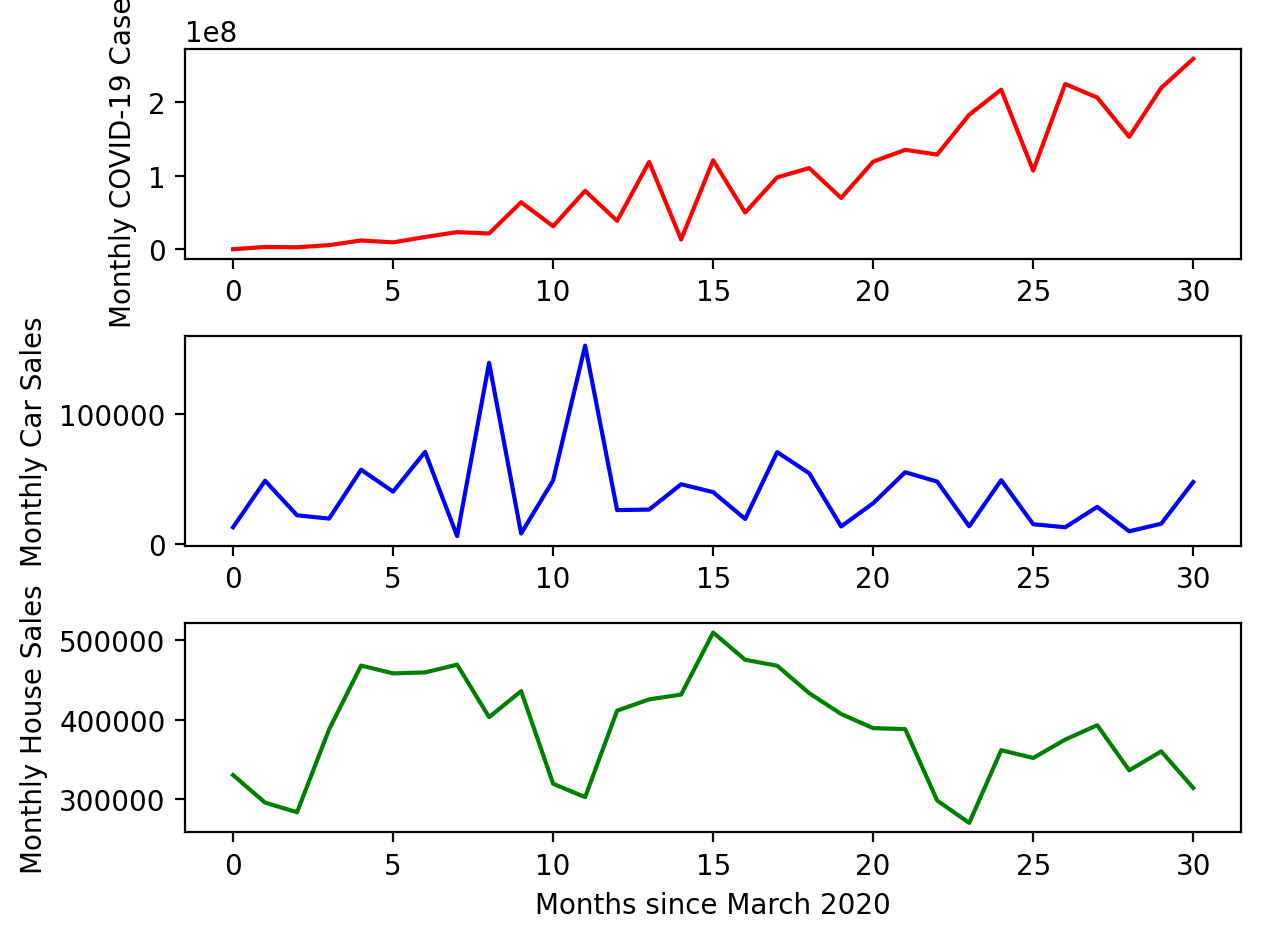

In [50]:
#visualizing each variables trend over time
plt.subplot(3, 1, 1)
sns.lineplot(final['tot_cases'], color = 'red')
plt.ylabel('Monthly COVID-19 Cases')

plt.subplot(3, 1, 2)
sns.lineplot(final['total_car_sales'], color = 'blue')
plt.ylabel('Monthly Car Sales'); 

plt.subplot(3, 1, 3)
sns.lineplot(final['total_sales'], color = 'green')
plt.ylabel('Monthly House Sales')
plt.xlabel('Months since March 2020') 

#space between plots
plt.tight_layout()

We can see some interesting interesting trends here. Monthly COVID-19 cases seems to have similar picks and droughs to monthly car sales; while monthly house sales seems to lag by 2-3 months from monthly car sales. We will explore these in more details. But before doing pairwise comparison, since we are not interested in comparing absolute numbers but rather the trends, we can normalize each of the variables.

In [51]:
#calculating cumulative counts for each variable
final['total_sales_cumulative'] = final['total_sales']
final['tot_cases_cumulative'] = final['tot_cases']
final['total_car_sales_cumulative'] = final['total_car_sales']

for i in range(1,31):
    final['tot_cases_cumulative'][i] = final['tot_cases_cumulative'][i] + final['tot_cases_cumulative'][i-1]
    final['total_sales_cumulative'][i] = final['total_sales_cumulative'][i] + final['total_sales_cumulative'][i-1]
    final['total_car_sales_cumulative'][i] = final['total_car_sales_cumulative'][i] + final['total_car_sales_cumulative'][i-1]
    

#calculating percentage of total change for each variable
final['sales_percent'] = 0
final['cases_percent'] = 0
final['car_sales_percent'] = 0

for i in range(1,31):
    final['sales_percent'][i] = final['total_sales'][i] / final['total_sales_cumulative'][30]
    final['cases_percent'][i] = final['tot_cases'][i] / final['tot_cases_cumulative'][30]
    final['car_sales_percent'][i] = final['total_car_sales'][i] / final['total_car_sales_cumulative'][30]
    
#deleting unnecessary cumulative count columns
del final["tot_cases_cumulative"]
del final["total_sales_cumulative"]
del final["total_car_sales_cumulative"]
final

/var/folders/_8/949s60_149n5bnn4kn3zgm_c0000gn/T/ipykernel_25248/2671387236.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['cases_percent'][i] = final['tot_cases'][i] / final['tot_cases_cumulative'][30]
/var/folders/_8/949s60_149n5bnn4kn3zgm_c0000gn/T/ipykernel_25248/2671387236.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['car_sales_percent'][i] = final['total_car_sales'][i] / final['total_car_sales_cumulative'][30]


,year,month,total_sales,tot_cases,total_car_sales,sales_percent,cases_percent,car_sales_percent
0,2020,3,330419,80625,13002,0.000000,0.000000,0.000000
1,2020,4,295684,3154693,48847,0.024609,0.001114,0.038923
2,2020,5,283667,2742809,22225,0.023609,0.000968,0.017710
3,2020,6,387808,5611648,19679,0.032277,0.001981,0.015681
4,2020,7,468119,11974289,57310,0.038961,0.004227,0.045667
5,2020,8,458327,9342275,40475,0.038146,0.003298,0.032252
6,2020,9,459520,16676113,71032,0.038245,0.005886,0.056601
7,2020,10,469298,23258669,6228,0.039059,0.008210,0.004963
8,2020,11,403270,21384416,139673,0.033564,0.007548,0.111297
9,2020,12,435993,63789515,8224,0.036287,0.022517,0.006553


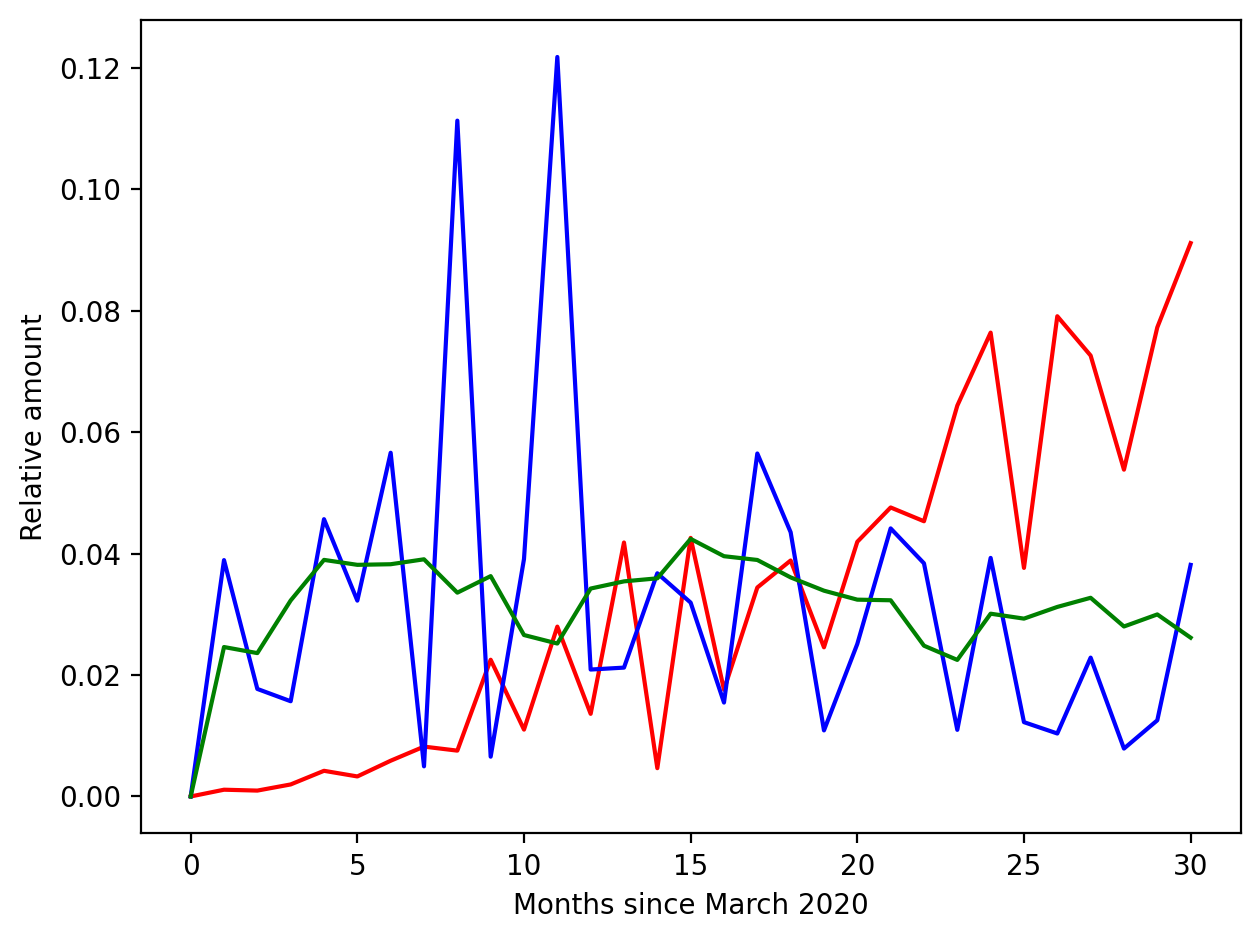

In [52]:
#visualizing each variable's percentage change trend over time
plt.subplot()
sns.lineplot(final['cases_percent'], color = 'red')
sns.lineplot(final['car_sales_percent'], color = 'blue')
sns.lineplot(final['sales_percent'], color = 'green')
plt.xlabel('Months since March 2020') 
plt.ylabel('Relative amount') 

#space between plots
plt.tight_layout()

We do see some similarities between blue (car sales) and red (positive cases) lines. To investigate it further, we will plot a scatter matrix to look for possible correlation.

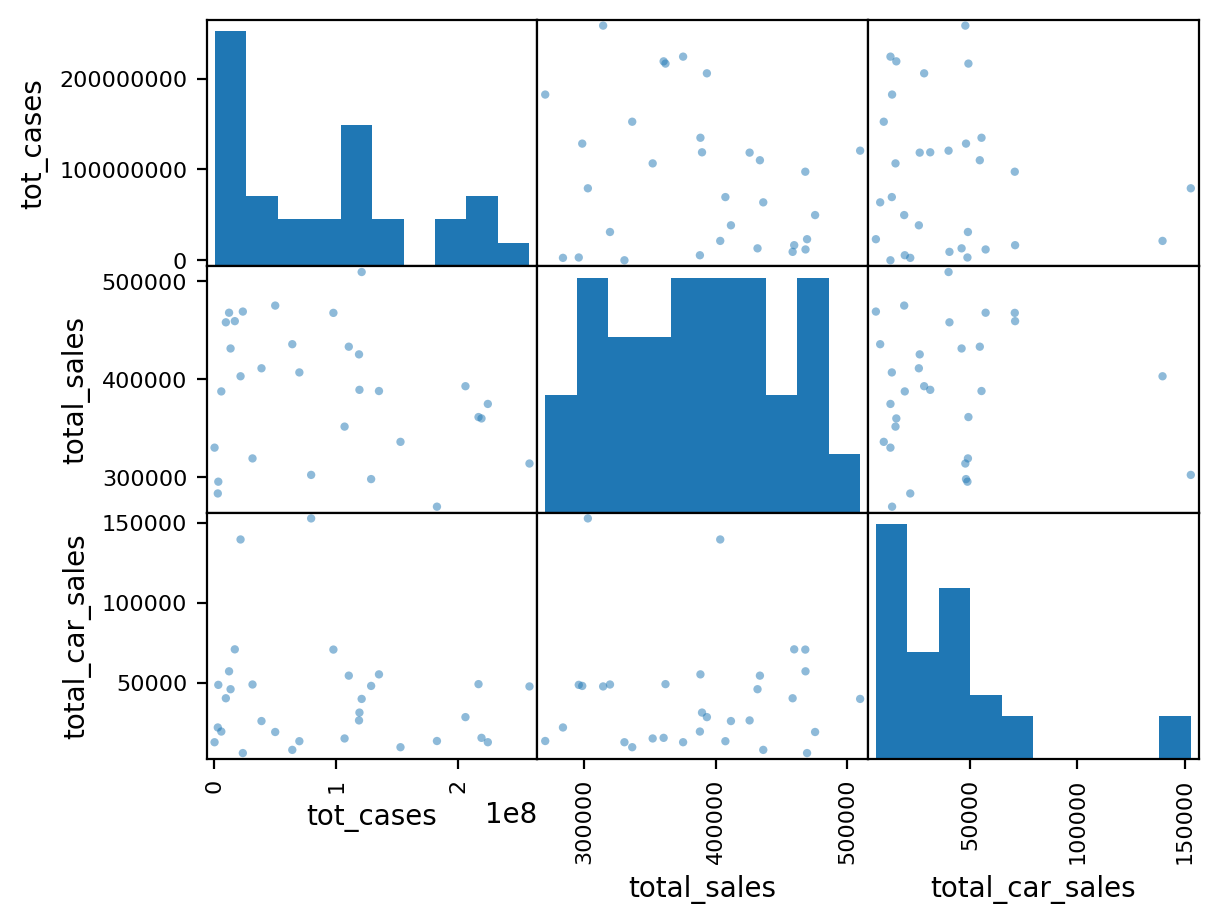

In [53]:
fig = pd.plotting.scatter_matrix(final[['tot_cases', 'total_sales', 'total_car_sales']])

We can see that our data has some heavy outliers. Let's find out what those are. There are 2 outliers with very high car sales counts. Let's drop them to see if our trends are anyhow affected.

In [68]:
#drop row of data corresponding to max car sales
with_dropped_vals = final.drop(labels=[final['total_car_sales'].idxmax()], axis = 0, inplace=False)

#drop row of data corresponding to new max car sales
with_dropped_vals.drop(labels=[with_dropped_vals['total_car_sales'].idxmax()], axis = 0, inplace=True)
with_dropped_vals = with_dropped_vals.reset_index(drop=True)
with_dropped_vals

,year,month,total_sales,tot_cases,total_car_sales,sales_percent,cases_percent,car_sales_percent
0,2020,3,330419,80625,13002,0.000000,0.000000,0.000000
1,2020,4,295684,3154693,48847,0.024609,0.001114,0.038923
2,2020,5,283667,2742809,22225,0.023609,0.000968,0.017710
3,2020,6,387808,5611648,19679,0.032277,0.001981,0.015681
4,2020,7,468119,11974289,57310,0.038961,0.004227,0.045667
5,2020,8,458327,9342275,40475,0.038146,0.003298,0.032252
6,2020,9,459520,16676113,71032,0.038245,0.005886,0.056601
7,2020,10,469298,23258669,6228,0.039059,0.008210,0.004963
8,2020,12,435993,63789515,8224,0.036287,0.022517,0.006553
9,2021,1,319428,31191045,49072,0.026586,0.011010,0.039103


Interestingly, note that both months with 2 greatest number of car sales appeared to be November 2020 and February of 2021. Based on our outside knowledge, it might be linked to detail shortages that limited number of sold cars which, in turn, occurred due to COVID-19. However, direct correlation might not be seen in the data. We explore if it so be reproduce the plots above. 

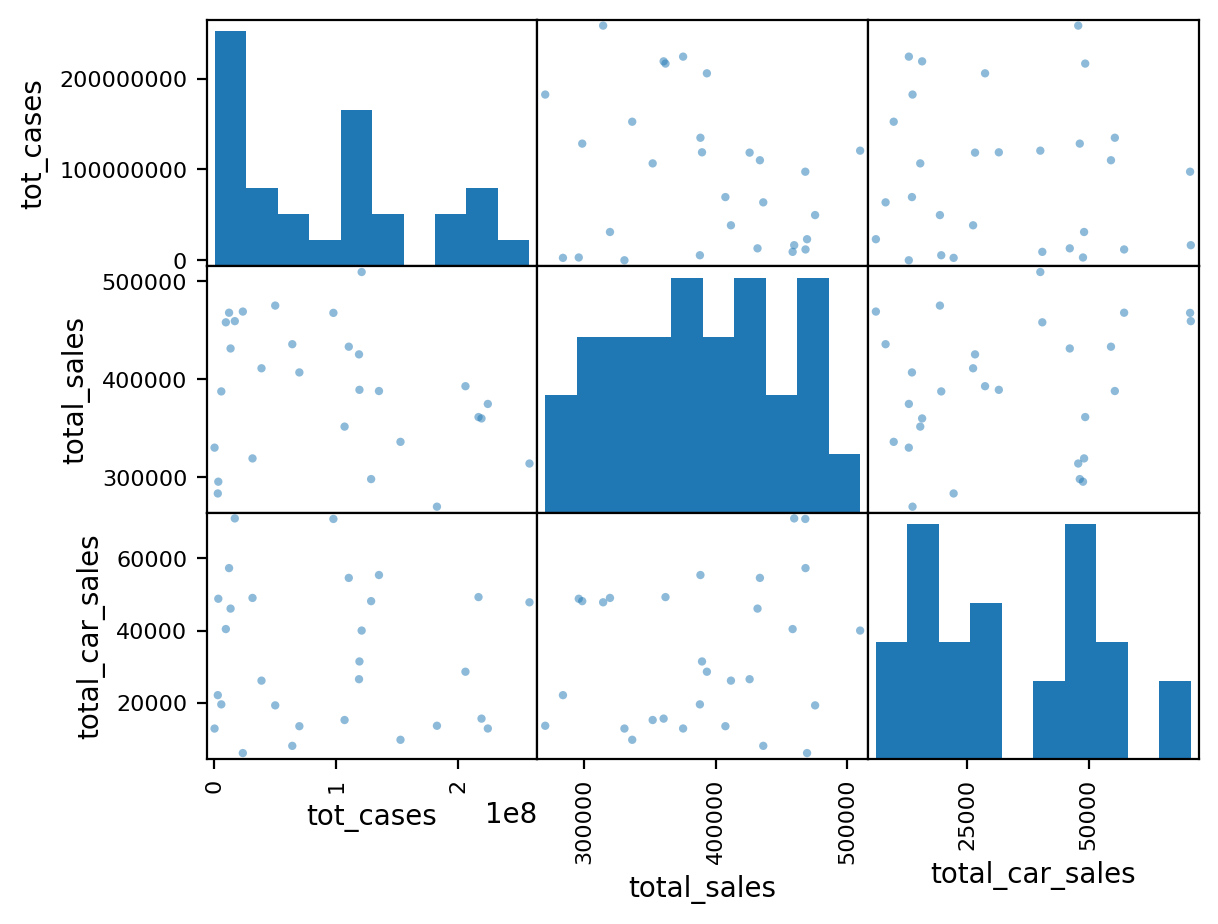

In [70]:
fig = pd.plotting.scatter_matrix(with_dropped_vals[['tot_cases', 'total_sales', 'total_car_sales']])

It is not clear from these graphical representations whether there actually is or not a correlation, however, it rests are quite sure that eve if there is a correlation, it won't be a strong one. To answer a question of whether there is or not a correlation, we perfrom linear regression. Moreover, we might not have a good reason to drop these to outliers so wee will proceed with analysis on our dataframe (with the two highest car sales months).

## Analysis

Let's perform a linear regression for the relationship between total car sales and the total number of cases. The null hypothesis in such case is that there is no relationship between total car sales and total number of cases. We will be using a significance level of 0.05.

In [56]:
regression_cars_case = sm.OLS.from_formula(formula="total_car_sales ~ tot_cases", data=final).fit()
print(regression_cars_case.summary())

                            OLS Regression Results                            
Dep. Variable:        total_car_sales   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.6748
Date:                Fri, 09 Dec 2022   Prob (F-statistic):              0.418
Time:                        17:20:13   Log-Likelihood:                -366.52
No. Observations:                  31   AIC:                             737.0
Df Residuals:                      29   BIC:                             739.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.646e+04   9512.369      4.884      0.0

From such results, we get a p-value of 0.418, when compared to a significance level of 0.05, then we fail to reject the null, which means that there is no relationship between total car sales and total COVID-19 cases.

Let's perform a linear regression for the relationship between total house sales and the total number of cases. The null hypothesis in such case is that there is no relationship between total house sales and total number of cases.

In [57]:
regression_houses_cases = sm.OLS.from_formula("total_sales ~ tot_cases", data=final).fit()
print(regression_houses_cases.summary())

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.925
Date:                Fri, 09 Dec 2022   Prob (F-statistic):              0.176
Time:                        17:20:13   Log-Likelihood:                -386.24
No. Observations:                  31   AIC:                             776.5
Df Residuals:                      29   BIC:                             779.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.066e+05    1.8e+04     22.631      0.0

From such results, we get a p-value of 0.176, when compared to a significance level of 0.05, then we fail to reject the null, which means that there is no relationship between total car sales and total cases.

# Ethics & Privacy

From a perspective of privacy, our data like any other data that deals with COVID-19 cases needs to consider the fact that an individual’s health status is private, personal information. So it is important to ensure that no personally identifying information is stored or used when analysing COVID-19 data. Luckily, our COVID-19 data comes from CDC and any personal identifying infromation was already removed.

This is also true of any data relating to car and house sales. Especially because the quality of cars one purchases often relates to one’s income and the privacy of an individual’s income needs to be kept private to the maximum extent possible. It would be our responsibility to ensure that any private information linking an individual’s identity to their car-purchase/ health status would be excluded from our data set. 

There is a possibility of bias in data we use due to the fact that COVID-19 cases are only reported by people who can afford to go to a hospital/primary care centre to get tested. People who can't afford or choose not to get tested are excluded from this data and we don't have any approximations of how many of them are there.

Another bias possibility arises since only people over the age of 16 are buying cars (due to legal reasons) while senior citizens whom COVID-19 disproportionately affects if other conditions are present are not buying cars due to their old age. As a result, we might be comparing younger citizens in one group to elder citizens in the other so the relationship between the groups may not be very strong unless controlled for age.

Everything we have done or will do is always going to be visible and open for public to any critiques or suggestions.

# Conclusion & Discussion

We wanted to study and identify correlations between COVID-19 positive cases and purchases of luxury cars and houses in the United States. We chose this topic because COVID-19 affected the globe, and it was interesting for us to see how the global pan(dem)ic influenced personal finances, especially on the level of goods which are considered as luxury, and property (houses). 

We used COVID-19 positive cases as an approximation of severity of public health situation at a point of time since it is close to how COVID-19 pandemic was addressed in the news and by the officials. We found that there was no relationship between total number of COVID-19 cases and house sales or car sales based on the results of linear regression models with standard alpha-level of 0.05.

Surprisingly to us, we were verey limited by availabilities of car and house sales datasets. It might be the case that this data is collected by and for profit organizations so making it public might give free information to your competitor. Nevertheless, it remains unclear why some reduced datasets are not publicly available since these wouldn't leak any information that competitors are seeking for while giving access might provide benefits to evaluations of the economy.

As described in the ethics section, it might have been the case that we just compared different populations. Unfortunately, we do not hold capabilities of securely accessing COVID-19 database that would include age of a person who got tested or bought a car nor were we able to locate these datasets publicly. This might be an intereesting next step to consider. It might have also been the case that our dataset is quite small and that's one of the reasons no correlations were found.

Overall, having completed this project we have improved our skills with basic data analyzation techniques which can be used and improved in the future. Even though we didn't find any correlations, our work can be used and improved to gain insights into economic theory and how COVID-19 pandemic affected different sectors of economy. It is important to study the mistakes that were made in policies and other managings of the COVID-19 pandemic to improve general policy practices and avoid these mistakes in the future (hopefully, without any pandemics).

# Team Contributions

- Raul Martinez Beltran: Wrote background and prior, ethics and privacy sections. Performed linear regressions and provided insights on results achieved. Assisted in data cleaning steps.
- Ilya Kogan: Wrote Conclusion & Discussion and Overview. Performed visualizations, EDA. Assisted in data cleaning steps and formatting of the whole notebook.
- Shresht Venkatraman: Collected and cleaned the data for Covid and Cars. Performed the data cleaning and re-organizing for all 3 data sets and merged them into one. Did some of the writing work for the Data Sets.
- Ishani Sikdar: Collected data for housing. Created slide show and video. Assisted with data cleaning.